In [4]:
import pandas as pd
import sqlite3
from datetime import datetime
import os
import sys
from collections import OrderedDict
import numpy as np

In [5]:
MET_res = "/home/cap/Downloads/MET_RESULTS"
all_results = os.listdir(MET_res)
results = OrderedDict()
for f in all_results:
    
    if f.endswith("_cts.txt"):
        read_date = f.split("_")[3]
        results[read_date]  = pd.read_csv(os.path.join(MET_res,f),sep=r'\s+')
    elif f.endswith(".nc"):
        ncfile = f
    

In [6]:
results.keys()


odict_keys(['20150525', '20150520', '20150507', '20150528', '20150512', '20150514', '20150526', '20150522', '20150511', '20150510', '20150521', '20150517', '20150503', '20150515', '20150518', '20150529', '20150530', '20150516', '20150509', '20150506', '20150527', '20150505', '20150513', '20150504', '20150524', '20150502', '20150519', '20150501', '20150523', '20150508', '20150531'])

#### PODY: is the probabily of detection. It  is the hit rate (HR)
####  POFS is the probabiliy of false detection. It is the false alarm rate (FAR)
#### ACC is the  accuracy

In [7]:
#PODY: is the probabily of detection. IT is the false alarm rate
# 
pod_cols = [col for col in results["20150507"].columns if "POD" in col]
pof_cols = [col for col in results["20150507"].columns if "POF" in col]
acc_cols = [col for col in results["20150507"].columns if "ACC" in col]
fss_cols = [col for col in results["20150507"].columns if "FSS" in col]


In [8]:
pod_cols

['PODY',
 'PODY_NCL',
 'PODY_NCU',
 'PODY_BCL',
 'PODY_BCU',
 'PODN',
 'PODN_NCL',
 'PODN_NCU',
 'PODN_BCL',
 'PODN_BCU']

In [9]:
pof_cols

['POFD', 'POFD_NCL', 'POFD_NCU', 'POFD_BCL', 'POFD_BCU']

In [10]:
acc_cols

['ACC', 'ACC_NCL', 'ACC_NCU', 'ACC_BCL', 'ACC_BCU']

In [11]:
fss_cols

[]

In [12]:
anom_corr_res = OrderedDict()
for f in all_results:
    
    if f.endswith("_cnt.txt"):
        read_date = f.split("_")[3]
        anom_corr_res[read_date]  = pd.read_csv(os.path.join(MET_res,f),sep=r'\s+')
    
    

In [13]:
anom_cols = [col for col in anom_corr_res["20150507"].columns if "ANOM" in col]
anom_cols

['ANOM_CORR',
 'ANOM_CORR_NCL',
 'ANOM_CORR_NCU',
 'ANOM_CORR_BCL',
 'ANOM_CORR_BCU',
 'ANOM_CORR_UNCNTR',
 'ANOM_CORR_UNCNTR_BCL',
 'ANOM_CORR_UNCNTR_BCU']

In [14]:
anom_corr_res["20150502"][['FCST_LEAD', 'FCST_VALID_BEG',
       'FCST_VALID_END', 'OBS_LEAD', 'OBS_VALID_BEG', 'OBS_VALID_END',"ANOM_CORR","VX_MASK"]]

,FCST_LEAD,FCST_VALID_BEG,FCST_VALID_END,OBS_LEAD,OBS_VALID_BEG,OBS_VALID_END,ANOM_CORR,VX_MASK
0,0,20150502_000000,20150502_000000,0,20150501_000000,20150501_000000,NaN,FULL
1,0,20150502_000000,20150502_000000,0,20150501_000000,20150501_000000,NaN,GREENLAND_WEST_SECTION
2,0,20150502_000000,20150502_000000,0,20150501_000000,20150501_000000,NaN,NUUK


In [15]:
results["20150501"][['FCST_LEAD', 'FCST_VALID_BEG',
       'FCST_VALID_END', 'OBS_LEAD', 'OBS_VALID_BEG', 'OBS_VALID_END',"PODY","VX_MASK"]]

,FCST_LEAD,FCST_VALID_BEG,FCST_VALID_END,OBS_LEAD,OBS_VALID_BEG,OBS_VALID_END,PODY,VX_MASK
0,0,20150501_000000,20150501_000000,0,20150501_000000,20150501_000000,0.98037,FULL
1,0,20150501_000000,20150501_000000,0,20150501_000000,20150501_000000,0.98115,GREENLAND_WEST_SECTION
2,0,20150501_000000,20150501_000000,0,20150501_000000,20150501_000000,0.92279,NUUK


In [16]:
results["20150501"]["VX_MASK"]

0                      FULL
1    GREENLAND_WEST_SECTION
2                      NUUK
Name: VX_MASK, dtype: object

In [59]:
#df = results["20150501"]

#mask = np.column_stack([df[col].str.contains(r"GREENLAND_WEST_SECTION", na=False) for col in df])


### Collect the values for all dates and take the PODY


In [60]:
REGION = "GREENLAND_WEST_SECTION"
REGION = "FULL"
hit_dict=OrderedDict()

for label in ["datetime","hit_rate"]:
    hit_dict[label] = []
for key_date in results.keys():
    df_sel = results[key_date][results[key_date]["VX_MASK"]  == REGION]
    hit_dict["hit_rate"].append(df_sel["PODY"].values[0])
    hit_dict["datetime"].append(datetime.strptime(df_sel["FCST_VALID_BEG"].values[0],"%Y%m%d_%H%M%S"))

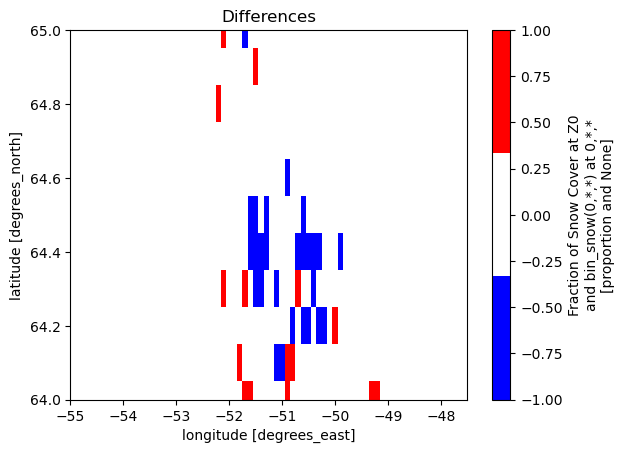

In [61]:
from matplotlib import pyplot as plt
import xarray as xr
import matplotlib.colors as mcolors
cmap_custom = mcolors.ListedColormap(['blue',"white", 'red'])  # Define a custom colormap with two colors

ncfile
nf = os.path.join(MET_res,ncfile)
dataset = xr.open_dataset(nf)
#var = "DIFF_FSNOWC_Z0_FSNOWC_Z0_GREENLAND_WEST_SECTION"
var = 'DIFF_FSNOWC_Z0_bin_snow_0_all_all_GREENLAND_WEST_SECTION'
# Define the range of latitude and longitude for the region you want to zoom in
lat_min, lat_max = 64,65
lon_min, lon_max = -55,-47.5

dataset[var].plot(x="lon",y="lat",cmap=cmap_custom)
# Set the axis limits based on the specified latitude and longitude range
plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)
#variable.plot(x='lon', y='lat')
variable = dataset[var]
plt.title('Differences')
plt.show()

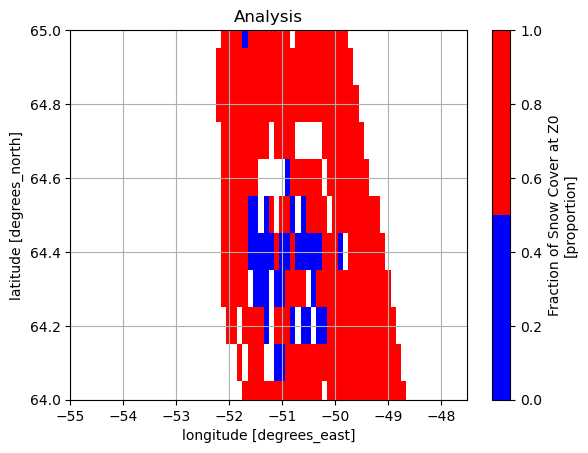

In [62]:
var = "FCST_FSNOWC_Z0_GREENLAND_WEST_SECTION"

cmap_custom = mcolors.ListedColormap(['blue', 'red'])  # Define a custom colormap with two colors

# Set the axis limits based on the specified latitude and longitude range
plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)


#plt.figure(figsize=(17, 21))  # Adjust size as needed


dataset[var].plot(x="lon",y="lat",cmap=cmap_custom)
#dataset[var].imshow(x="lon",y="lat",cmap=cmap_custom)
#img = plt.imshow(dataset[var], cmap=cmap_custom, extent=(lon_min, lon_max, lat_min, lat_max))

# Add colorbar with two discrete values



# Set the axis limits based on the specified latitude and longitude range
plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)
#variable.plot(x='lon', y='lat')
variable = dataset[var]
plt.title('Analysis')
#cbar = plt.colorbar(ticks=[0, 1],orientation='horizontal', pad=0.1)
#cbar.set_ticklabels(['0', '1'])  # Set tick labels
#cbar.set_label('Variable Label')
#plt.grid()
plt.show()

In [89]:
dataset[var]

<xarray.DataArray 'FCST_FSNOWC_Z0_GREENLAND_WEST_SECTION' (lat: 302, lon: 1475)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 55.9 56.0 56.1 56.2 56.3 ... 85.6 85.7 85.8 85.9 86.0
  * lon      (lon) float32 -109.7 -109.6 -109.5 -109.4 ... 37.4 37.5 37.6 37.7
Attributes:
    name:                    FCST_FSNOWC_Z0_GREENLAND_WEST_SECTION
    long_name:               Fraction of Snow Cover at Z0
    level:                   Z0
    units:                   proportion
    init_time:               20150502_000000
    init_time_ut:            1430524800
    valid_time:              20150502_000000
    valid_time_ut:           1430524800
    desc:                    NA
    masking_region:          GREENLAND_WEST_SECTION
    smoothing_method:        NEAREST
    smoothing_neighborhood:  1

(64.0, 65.0)

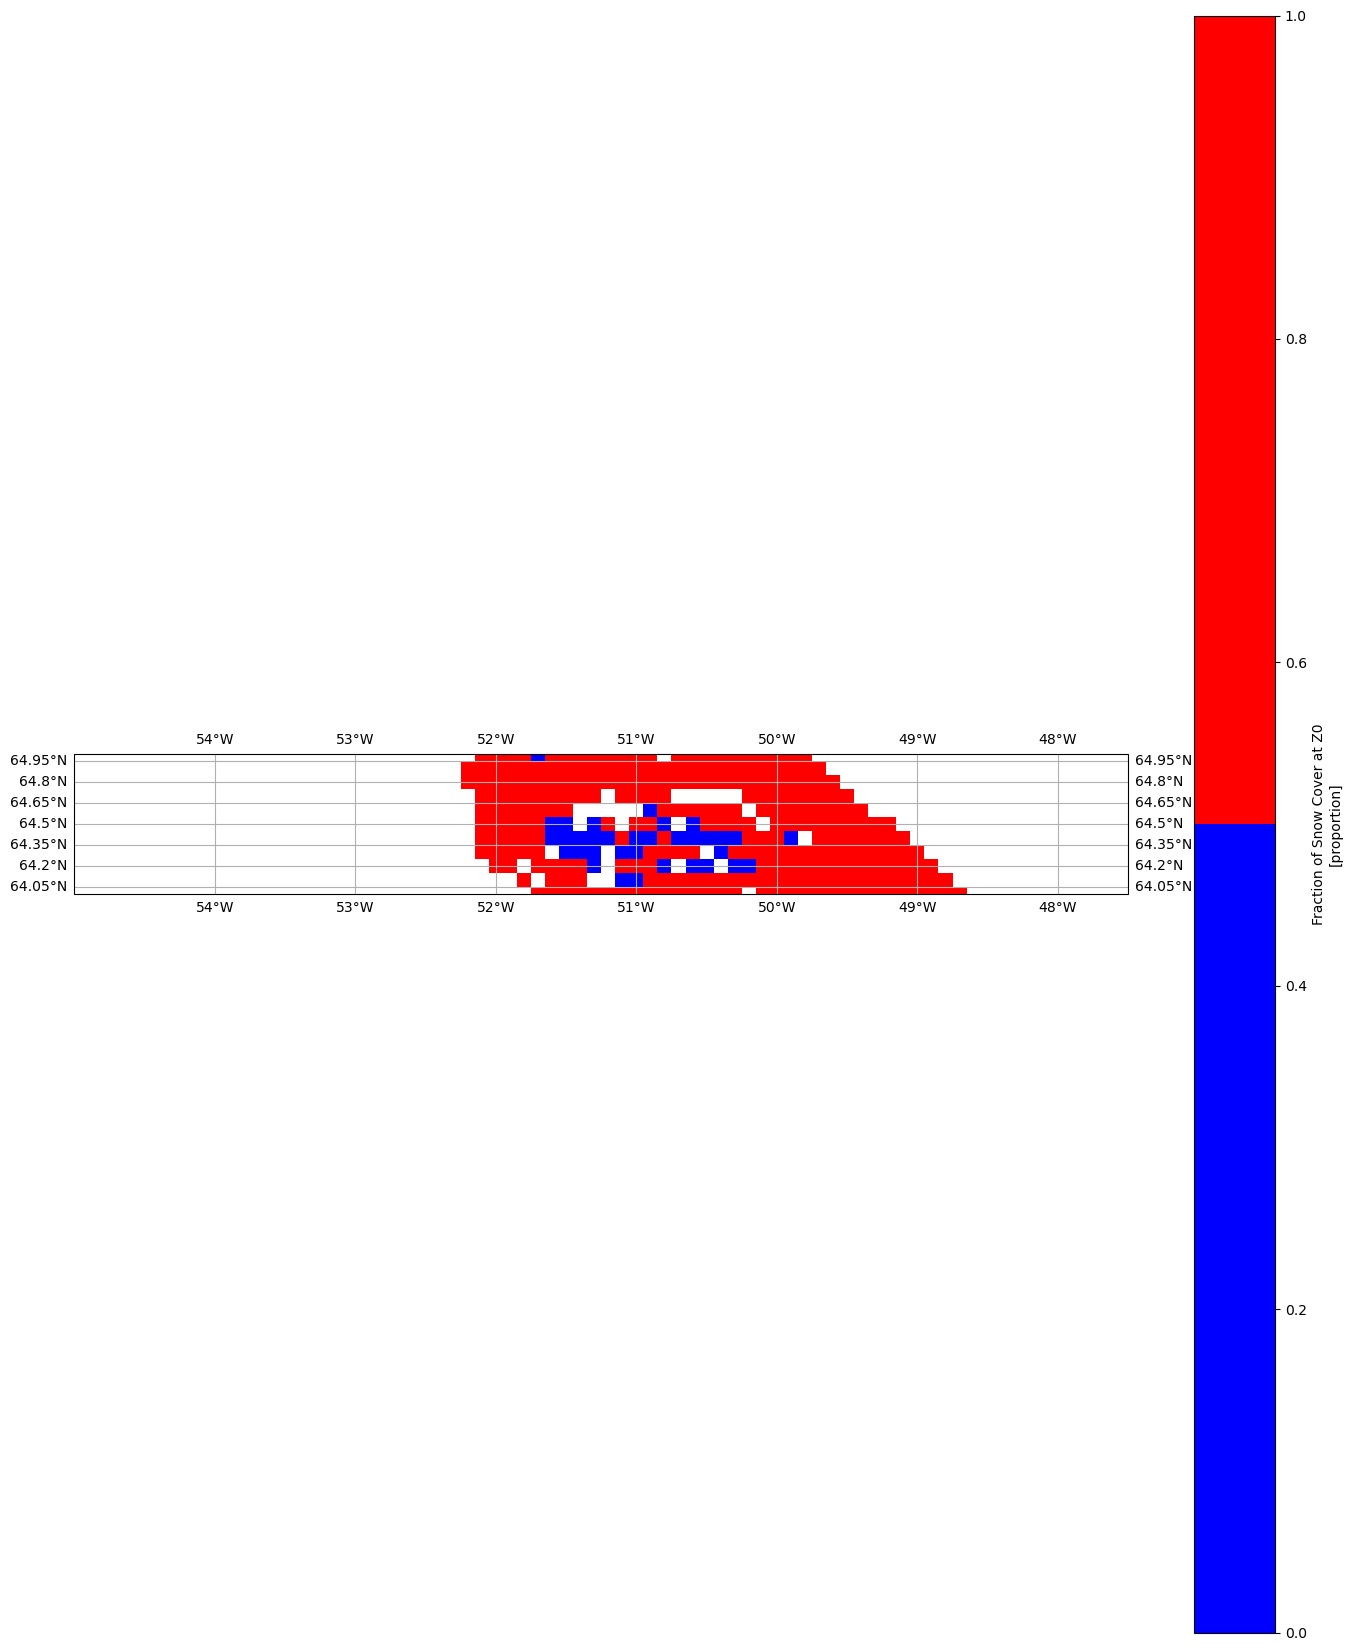

In [88]:
import cartopy.crs as ccrs
plt.figure(figsize=(17, 21))  # Adjust size as needed

ax = plt.subplot(projection=ccrs.PlateCarree())
plot = dataset[var].plot.pcolormesh(x="lon",y="lat",cmap=cmap_custom)
#cbar = plt.colorbar(ticks=[0, 1],orientation='horizontal', pad=0.1)
#plt.colorbar(orientation='horizontal')
#cbar=plot.colorbar(ticks=[0, 1],location="bottom")

ax.gridlines(draw_labels=True)

plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)

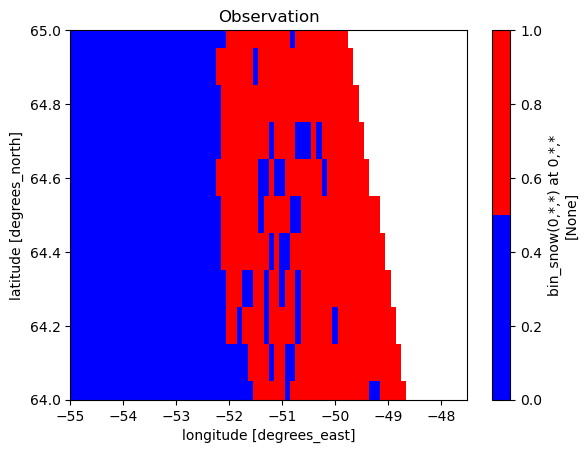

In [15]:
var = "OBS_FSNOWC_Z0_GREENLAND_WEST_SECTION"
var = 'OBS_bin_snow_0_all_all_GREENLAND_WEST_SECTION'

dataset[var].plot(x="lon",y="lat",cmap=cmap_custom)
# Set the axis limits based on the specified latitude and longitude range
plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)
#variable.plot(x='lon', y='lat')
variable = dataset[var]
plt.title('Observation')
plt.show()

In [16]:
variable.coords
# Access latitude and longitude variables
latitudes = dataset.coords['lat']  # Adjust 'latitude' to the correct coordinate name
longitudes = dataset.coords['lon']  # Adjust 'longitude' to the correct c

In [17]:
latitudes

<xarray.DataArray 'lat' (lat: 302)>
array([55.9, 56. , 56.1, ..., 85.8, 85.9, 86. ], dtype=float32)
Coordinates:
  * lat      (lat) float32 55.9 56.0 56.1 56.2 56.3 ... 85.6 85.7 85.8 85.9 86.0
Attributes:
    long_name:      latitude
    units:          degrees_north
    standard_name:  latitude

In [18]:
# Define the range of latitude and longitude for the region you want to zoom in
#lat_min, lat_max = 60,65
#lon_min, lon_max = -60,-40

# Select the data within the specified latitude and longitude range
#variable_zoomed = variable.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

# Plot the variable for the zoomed-in region
#variable_zoomed.plot()


(array([16556., 16560., 16564., 16568., 16572., 16576., 16580., 16584.,
        16587.]),
 [Text(16556.0, 0, '2015-05-01'),
  Text(16560.0, 0, '2015-05-05'),
  Text(16564.0, 0, '2015-05-09'),
  Text(16568.0, 0, '2015-05-13'),
  Text(16572.0, 0, '2015-05-17'),
  Text(16576.0, 0, '2015-05-21'),
  Text(16580.0, 0, '2015-05-25'),
  Text(16584.0, 0, '2015-05-29'),
  Text(16587.0, 0, '2015-06-01')])

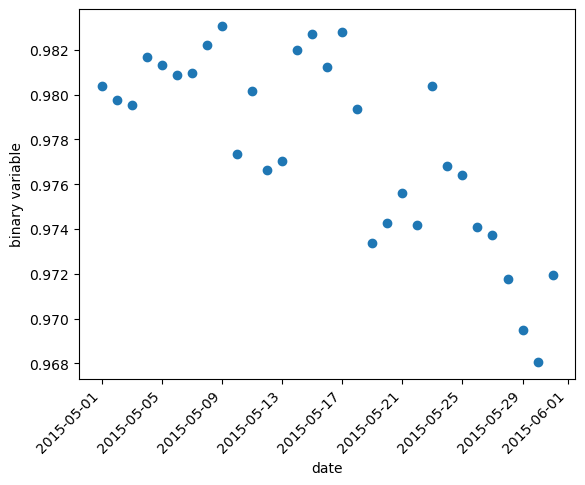

In [19]:
fig, ax = plt.subplots()
ax.plot(hit_dict["datetime"],hit_dict["hit_rate"],"o")
ax.set_xlabel('date')
ax.set_ylabel('binary variable')
#ax.legend()
plt.xticks(rotation=45, ha='right')


### find fraction skill score

In [20]:
fss_files=OrderedDict()
for f in all_results:
    
    if f.endswith("_nbrcnt.txt"):
        read_date = f.split("_")[3]
        fss_files[read_date]  = pd.read_csv(os.path.join(MET_res,f),sep=r'\s+')
    
    

In [21]:
fss_files.keys()

odict_keys(['20150525', '20150521', '20150507', '20150516', '20150504', '20150527', '20150514', '20150522', '20150503', '20150526', '20150513', '20150512', '20150515', '20150529', '20150506', '20150518', '20150531', '20150510', '20150523', '20150502', '20150505', '20150509', '20150528', '20150519', '20150501', '20150517', '20150530', '20150511', '20150520', '20150508', '20150524'])

In [24]:
# other columns
fss_files["20150525"].columns

Index(['VERSION', 'MODEL', 'DESC', 'FCST_LEAD', 'FCST_VALID_BEG',
       'FCST_VALID_END', 'OBS_LEAD', 'OBS_VALID_BEG', 'OBS_VALID_END',
       'FCST_VAR', 'FCST_UNITS', 'FCST_LEV', 'OBS_VAR', 'OBS_UNITS', 'OBS_LEV',
       'OBTYPE', 'VX_MASK', 'INTERP_MTHD', 'INTERP_PNTS', 'FCST_THRESH',
       'OBS_THRESH', 'COV_THRESH', 'ALPHA', 'LINE_TYPE', 'TOTAL', 'FBS',
       'FBS_BCL', 'FBS_BCU', 'FSS', 'FSS_BCL', 'FSS_BCU', 'AFSS', 'AFSS_BCL',
       'AFSS_BCU', 'UFSS', 'UFSS_BCL', 'UFSS_BCU', 'F_RATE', 'F_RATE_BCL',
       'F_RATE_BCU', 'O_RATE', 'O_RATE_BCL', 'O_RATE_BCU'],
      dtype='object')

In [48]:
fss_files["20150525"][["VX_MASK","INTERP_PNTS","FSS","FCST_LEAD","FCST_VALID_BEG","FCST_VALID_END"]]

,VX_MASK,INTERP_PNTS,FSS,FCST_LEAD,FCST_VALID_BEG,FCST_VALID_END
0,FULL,1,0.93752,0,20150525_000000,20150525_000000
1,GREENLAND_WEST_SECTION,1,0.76869,0,20150525_000000,20150525_000000
2,FULL,9,0.95998,0,20150525_000000,20150525_000000
3,GREENLAND_WEST_SECTION,9,0.81863,0,20150525_000000,20150525_000000
4,FULL,25,0.96403,0,20150525_000000,20150525_000000
5,GREENLAND_WEST_SECTION,25,0.82573,0,20150525_000000,20150525_000000
6,FULL,49,0.96566,0,20150525_000000,20150525_000000
7,GREENLAND_WEST_SECTION,49,0.82879,0,20150525_000000,20150525_000000


In [22]:
fss_cols = [col for col in fss_files["20150501"].columns if "FSS" in col]
fss_cols

['FSS',
 'FSS_BCL',
 'FSS_BCU',
 'AFSS',
 'AFSS_BCL',
 'AFSS_BCU',
 'UFSS',
 'UFSS_BCL',
 'UFSS_BCU']

In [23]:
fss_files["20150521"][["FSS"]]

,FSS
0,0.93760
1,0.86881
2,0.95944
3,0.92783
4,0.96349
5,0.93664
6,0.96498
7,0.94154


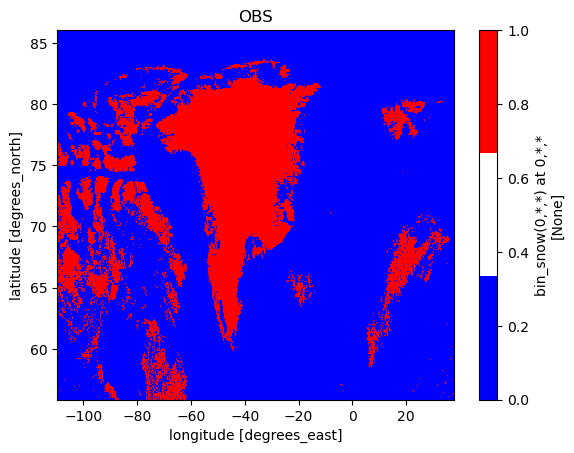

In [40]:

cmap_custom = mcolors.ListedColormap(['blue',"white", 'red'])  # Define a custom colormap with two colors

ncfile
nf = os.path.join(MET_res,ncfile)
dataset = xr.open_dataset(nf)
var = "OBS_FSNOWC_Z0_FULL"
var = 'OBS_bin_snow_0_all_all_FULL'
# Define the range of latitude and longitude for the region you want to zoom in
lat_min, lat_max = 64,65
lon_min, lon_max = -55,-47.5

dataset[var].plot(x="lon",y="lat",cmap=cmap_custom)
# Set the axis limits based on the specified latitude and longitude range
#plt.xlim(lon_min, lon_max)
#plt.ylim(lat_min, lat_max)
#variable.plot(x='lon', y='lat')
variable = dataset[var]
plt.title('OBS')
plt.show()

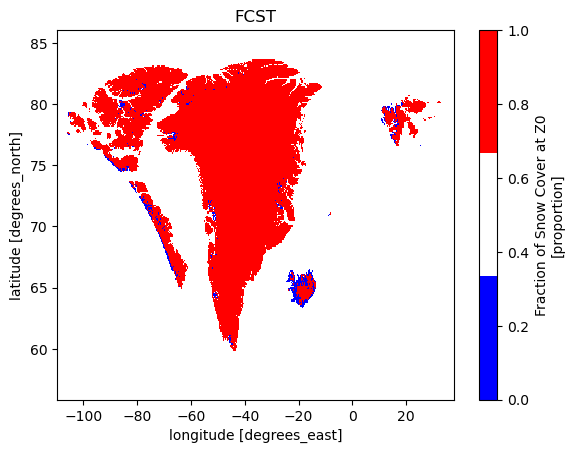

In [41]:
var = "FCST_FSNOWC_Z0_FULL"
# Define the range of latitude and longitude for the region you want to zoom in
lat_min, lat_max = 64,65
lon_min, lon_max = -55,-47.5

dataset[var].plot(x="lon",y="lat",cmap=cmap_custom)
# Set the axis limits based on the specified latitude and longitude range
#plt.xlim(lon_min, lon_max)
#plt.ylim(lat_min, lat_max)
#variable.plot(x='lon', y='lat')
variable = dataset[var]
plt.title('FCST')
plt.show()

In [42]:
#dataset.variables

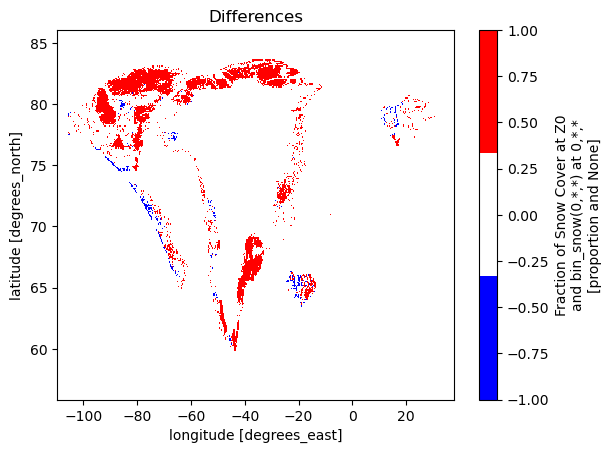

In [44]:
dataset

var = "DIFF_FSNOWC_Z0_FSNOWC_Z0_FULL"
var = 'DIFF_FSNOWC_Z0_bin_snow_0_all_all_FULL'
dataset[var].plot(x="lon",y="lat",cmap=cmap_custom)
plt.title('Differences')
plt.show()

In [157]:
#mymap = folium.Map(location=[obs_sel['lat'].mean(), obs_sel['lon'].mean()], zoom_start=5)
#obs_sel.drop_duplicates(subset="SID",inplace=True)

In [153]:
#for index, row in obs_sel.iterrows():
#    folium.Marker([row['lat'], row['lon']], popup=row['SID']).add_to(mymap)

### Plot the FSS for a given domain

In [90]:
date_sel = "20150525"
get_fss_all = fss_files[date_sel][fss_files[date_sel]["VX_MASK"] == "FULL"]
get_fss_gr = fss_files[date_sel][fss_files[date_sel]["VX_MASK"] == "GREENLAND_WEST_SECTION"]

fss_all = get_fss_all[["INTERP_PNTS","FSS","FCST_LEAD","FCST_VALID_BEG","FCST_VALID_END"]]

In [91]:
fss_all

,INTERP_PNTS,FSS,FCST_LEAD,FCST_VALID_BEG,FCST_VALID_END
0,1,0.93752,0,20150525_000000,20150525_000000
2,9,0.95998,0,20150525_000000,20150525_000000
4,25,0.96403,0,20150525_000000,20150525_000000
6,49,0.96566,0,20150525_000000,20150525_000000


In [92]:
fss_gr = get_fss_gr[["INTERP_PNTS","FSS","FCST_LEAD","FCST_VALID_BEG","FCST_VALID_END"]]
fss_gr

,INTERP_PNTS,FSS,FCST_LEAD,FCST_VALID_BEG,FCST_VALID_END
1,1,0.76869,0,20150525_000000,20150525_000000
3,9,0.81863,0,20150525_000000,20150525_000000
5,25,0.82573,0,20150525_000000,20150525_000000
7,49,0.82879,0,20150525_000000,20150525_000000
